# Q* Learning with FrozenLake 🕹️⛄
<br> 
In this Notebook, we'll implement an agent <b>that plays FrozenLake.</b>
<img src="https://github.com/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q%20learning/FrozenLake/frozenlake.png?raw=1" alt="Frozen Lake"/>

The goal of this game is <b>to go from the starting state (S) to the goal state (G)</b> by walking only on frozen tiles (F) and avoid holes (H).However, the ice is slippery, <b>so you won't always move in the direction you intend (stochastic environment)</b>

## Step 0: Import the dependencies 📚
We use 3 libraries:
- `Numpy` for our Qtable
- `OpenAI Gym` for our FrozenLake Environment
- `Random` to generate random numbers

In [0]:
import numpy as np
import gym
import random

In [0]:
import matplotlib.pyplot as plt

def plot_values(V):
	# reshape value function
	V_sq = np.reshape(V, (8,8))

	# plot the state-value function
	fig = plt.figure(figsize=(12, 12))
	ax = fig.add_subplot(111)
	im = ax.imshow(V_sq, cmap='cool')
	for (j,i),label in np.ndenumerate(V_sq):
	    ax.text(i, j, np.round(label, 5), ha='center', va='center', fontsize=14)
	plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
	plt.title('State-Value Function')
	plt.show()

## Step 1: Create the environment 🎮
- Here we'll create the FrozenLake environment. 
- OpenAI Gym is a library <b> composed of many environments that we can use to train our agents.</b>
- In our case we choose to use Frozen Lake.

In [0]:
env = gym.make("FrozenLake8x8-v0")

## Step 2: Create the Q-table and initialize it 🗄️
- Now, we'll create our Q-table, to know how much rows (states) and columns (actions) we need, we need to calculate the action_size and the state_size
- OpenAI Gym provides us a way to do that: `env.action_space.n` and `env.observation_space.n`

In [0]:
action_size = env.action_space.n
state_size = env.observation_space.n

In [91]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Step 3: Create the hyperparameters ⚙️
- Here, we'll specify the hyperparameters

In [0]:
total_episodes = 100000        # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 99                # Max steps per episode
gamma = 0.95                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.0001             # Exponential decay rate for exploration prob

## Step 4: The Q learning algorithm 🧠
- Now we implement the Q learning algorithm:
<img src="https://github.com/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q%20learning/FrozenLake/qtable_algo.png?raw=1" alt="Q algo"/>

In [101]:
# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        total_rewards += reward
        
        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish episode
        if done == True: 
            break
        
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)


Score over time: 0.19736
[[7.74851416e-03 7.83538630e-03 9.95482668e-03 7.83594844e-03]
 [1.15183312e-02 1.10391332e-02 8.34016050e-03 1.47341561e-02]
 [1.01221467e-02 1.48912007e-02 2.18501013e-02 1.18119649e-02]
 [1.62871355e-02 1.76075914e-02 1.65601284e-02 2.19188764e-02]
 [1.93965962e-02 1.88995487e-02 1.88540218e-02 1.88285696e-02]
 [2.25745075e-02 2.14286533e-02 2.24859074e-02 2.20766118e-02]
 [4.34581608e-02 2.35104235e-02 2.41745481e-02 2.40095357e-02]
 [2.54405973e-02 2.74686340e-02 2.65062711e-02 2.67892374e-02]
 [8.80282895e-03 7.53709815e-03 5.85749269e-03 9.15281658e-03]
 [9.60337528e-03 9.29223312e-03 8.95055854e-03 1.10748132e-02]
 [8.28363223e-03 1.29402113e-02 9.57447895e-03 1.25484055e-02]
 [1.74065734e-03 4.43027794e-03 4.25920122e-03 1.81479603e-02]
 [1.46089043e-02 1.66297830e-02 1.37774631e-02 1.02492690e-01]
 [1.37201439e-02 1.98466286e-02 1.57627386e-02 1.29733100e-01]
 [2.75648805e-02 2.80032602e-02 6.51359373e-02 2.79834005e-02]
 [2.84487917e-02 1.59055299e-0

[[9.95482668e-03 1.47341561e-02 2.18501013e-02 2.19188764e-02
  1.93965962e-02 2.25745075e-02 4.34581608e-02 2.74686340e-02]
 [9.15281658e-03 1.10748132e-02 1.29402113e-02 1.81479603e-02
  1.02492690e-01 1.29733100e-01 6.51359373e-02 1.59055299e-01]
 [1.26274906e-02 1.02755001e-02 3.05508250e-02 0.00000000e+00
  2.96213789e-03 2.22756687e-02 1.10308092e-01 1.26957559e-01]
 [1.50691515e-02 2.06606102e-02 1.09352085e-02 7.96745125e-03
  1.89904036e-03 0.00000000e+00 8.61736605e-02 2.56615701e-01]
 [1.61129661e-03 1.12580856e-03 6.73863992e-07 0.00000000e+00
  1.01488354e-03 1.48412062e-02 4.93124822e-01 2.72961720e-01]
 [7.02142689e-04 0.00000000e+00 0.00000000e+00 4.31627582e-06
  3.44189270e-04 3.42326008e-03 0.00000000e+00 3.84336325e-01]
 [2.80879826e-04 0.00000000e+00 1.53584201e-04 4.05971943e-07
  0.00000000e+00 4.78753705e-01 0.00000000e+00 8.67770366e-01]
 [2.79697081e-04 2.37111216e-04 6.94589232e-05 0.00000000e+00
  5.67528889e-01 7.51426234e-01 9.66013092e-01 0.00000000e+00]]

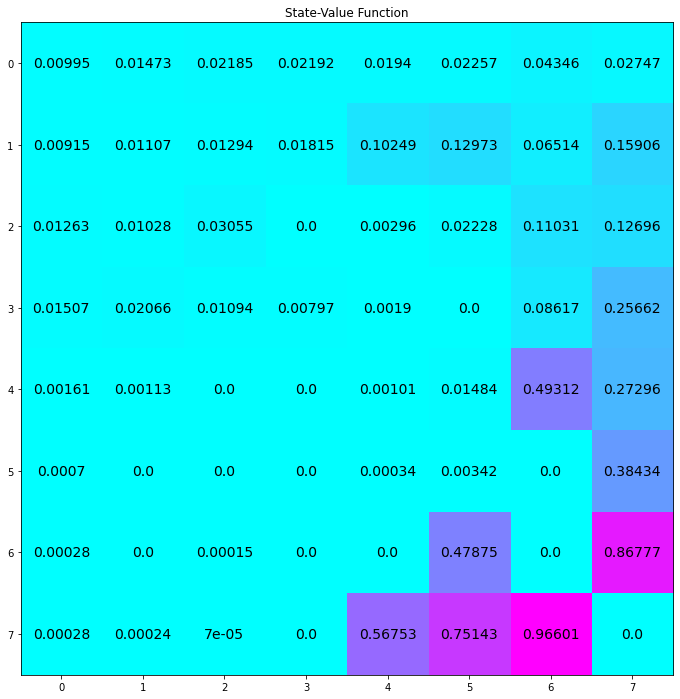

Final Policy: 
[[2 3 2 3 0 0 0 1]
 [3 3 1 3 3 3 2 1]
 [3 3 0 0 3 3 2 0]
 [3 3 3 1 0 0 2 1]
 [0 3 3 0 3 1 3 2]
 [0 0 0 1 2 0 0 2]
 [0 0 1 2 0 2 0 2]
 [3 1 0 0 1 2 1 0]]


In [102]:
q_valuemap = np.amax(qtable, axis=1)
print(q_valuemap.reshape((8,8)))
plot_values(q_valuemap)

q_policymap = np.argmax(qtable, axis=1)
print('Final Policy: ')
print(q_policymap.reshape((8,8)))

## Step 5: Use our Q-table to play FrozenLake ! 👾
- After 10 000 episodes, our Q-table can be used as a "cheatsheet" to play FrozenLake"
- By running this cell you can see our agent playing FrozenLake.

In [0]:
def play_episodes(enviorment, n_episodes, policy, random = False):
    """
    This fucntion plays the given number of episodes given by following a policy or sample randomly from action_space.
    
    Parameters:
        enviorment: openAI GYM object
        n_episodes: number of episodes to run
        policy: Policy to follow while playing an episode
        random: Flag for taking random actions. if True no policy would be followed and action will be taken randomly
        
    Return:
        wins: Total number of wins playing n_episodes
        total_reward: Total reward of n_episodes
        avg_reward: Average reward of n_episodes
    
    """
    # intialize wins and total reward
    wins = 0
    total_reward = 0
    
    # loop over number of episodes to play
    for episode in range(n_episodes):
        
        # flag to check if the game is finished
        terminated = False
        
        # reset the enviorment every time when playing a new episode
        state = enviorment.reset()
        
        while not terminated:
            
            # check if the random flag is not true then follow the given policy other wise take random action
            if random:
                action = enviorment.action_space.sample()
            else:
                action = policy[state]

            # take the next step
            next_state, reward,  terminated, info = enviorment.step(action)
            
            # enviorment.render()
            
            # accumalate total reward
            total_reward += reward
            
            # change the state
            state = next_state
            
            # if game is over with positive reward then add 1.0 in wins
            if terminated and reward == 1.0:
                wins += 1
                
    # calculate average reward
    average_reward = total_reward / n_episodes
    
    return wins, total_reward, average_reward

In [0]:
n_episode = 1000
wins, total_reward, avg_reward = play_episodes(env, n_episode, q_policymap, random = False)

In [115]:
print(f'Total wins with q learning: {wins}')
print(f"Average rewards with q learning: {avg_reward}")

Total wins with q learning: 305
Average rewards with q learning: 0.305
